In [1]:
from emd_analysis_functions import *

In [2]:
# Load the HPC data from the trials during the OS task. In the 'HPC' column you will find the amplitude on each nth sample
t1 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t1/HPC_100_CH4_0.continuous.mat')['HPC']
t2 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t2/HPC_100_CH4_0.continuous.mat')['HPC']
t3 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t3/HPC_100_CH4_0.continuous.mat')['HPC']
t4 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t4/HPC_100_CH4_0.continuous.mat')['HPC']
t5 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t5/HPC_100_CH4_0.continuous.mat')['HPC']
t6 = scipy.io.loadmat('/Users/adrianbontje/Desktop/thesiski/analysis/t6/HPC_100_CH4_0.continuous.mat')['HPC']


srate = 1000
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 25, 24*10, 'linear')
# for time_centres: np.arange(len(t))-.5


In [3]:
#Method #1: iterated mask default settings
itmaskconfig = emd.sift.get_config('iterated_mask_sift')
itmaskconfig['max_imfs'] = 8
itmaskconfig['sample_rate'] = srate
itmaskconfig['ret_mask_freq'] = True
itmask = partial(emd.sift.iterated_mask_sift, **itmaskconfig)

# Method #2: mask sift with mask frequency based on amplitude-weighted mean IF of first IMF from regular sifting. 
ifmaskconfig = emd.sift.get_config('mask_sift')
ifmaskconfig['mask_freqs'] = 'if'
ifmaskconfig['max_imfs'] = 8
# To compare the masks used
ifmaskconfig['ret_mask_freq'] = True
# the function ifmask will run a masked sift on a signal x, with the mask frequency based on IF of first IMF.
# should return the IMFs and the mask frequencies used
ifmask = partial(emd.sift.mask_sift, **ifmaskconfig)

# Method #3: mask sift with mask frequency based on the amount of zero crossings of first IMF through 'regular' sifting. 
zcmaskconfig = emd.sift.get_config('mask_sift')
zcmaskconfig['max_imfs'] = 8
zcmaskconfig['ret_mask_freq'] = True
# the function zcmask will run a masked sift on a signal x, with the mask frequency based on the amount of zero crossings of first IMF.
# should return the IMFs and the mask frequencies used
zcmask = partial(emd.sift.mask_sift, **zcmaskconfig)

#Method #4: iterated mask IF
itmaskifconfig = emd.sift.get_config('iterated_mask_sift')
itmaskifconfig['max_imfs'] = 8
itmaskifconfig['sample_rate'] = srate
itmaskifconfig['ret_mask_freq'] = True
itmaskifconfig['mask_0'] = 'if'
itmaskif = partial(emd.sift.iterated_mask_sift, **itmaskifconfig)

# Method #5: Ensemble sift with 24 ensembles
# imf4 = emd.sift.ensemble_sift(lfp, max_imfs=10, nensembles=24, nprocesses=6, ensemble_noise=1)
ensembleconfig = emd.sift.get_config('ensemble_sift')
ensembleconfig['nensembles'] = 24
ensembleconfig['max_imfs'] = 8
ensembleconfig['nprocesses'] = 6
ensembleconfig['ensemble_noise'] = 1
ensemble = partial(emd.sift.ensemble_sift, **ensembleconfig)



method_names = ['Iterated mask sift ZC', 'Masked sift IF', 'Masked sift ZC', 'Iterated mask sift IF', 'Ensemble sift']


In [5]:
#Plot for ten seconds of a trial
# fig199,axs199 = plt.subplots(1,1, figsize=(20,10))
# plt.plot(np.linspace(0,10*srate-1, 10*srate)/srate, t1[:10*srate])
# axs199.set_xlabel('Time (s)',size=25)
# axs199.set_ylabel('\u03BCv', size=25)
# axs199.set_title('Trial 1', size=30)
# axs199.xaxis.set_tick_params(labelsize=20)
# axs199.yaxis.set_tick_params(labelsize=20)

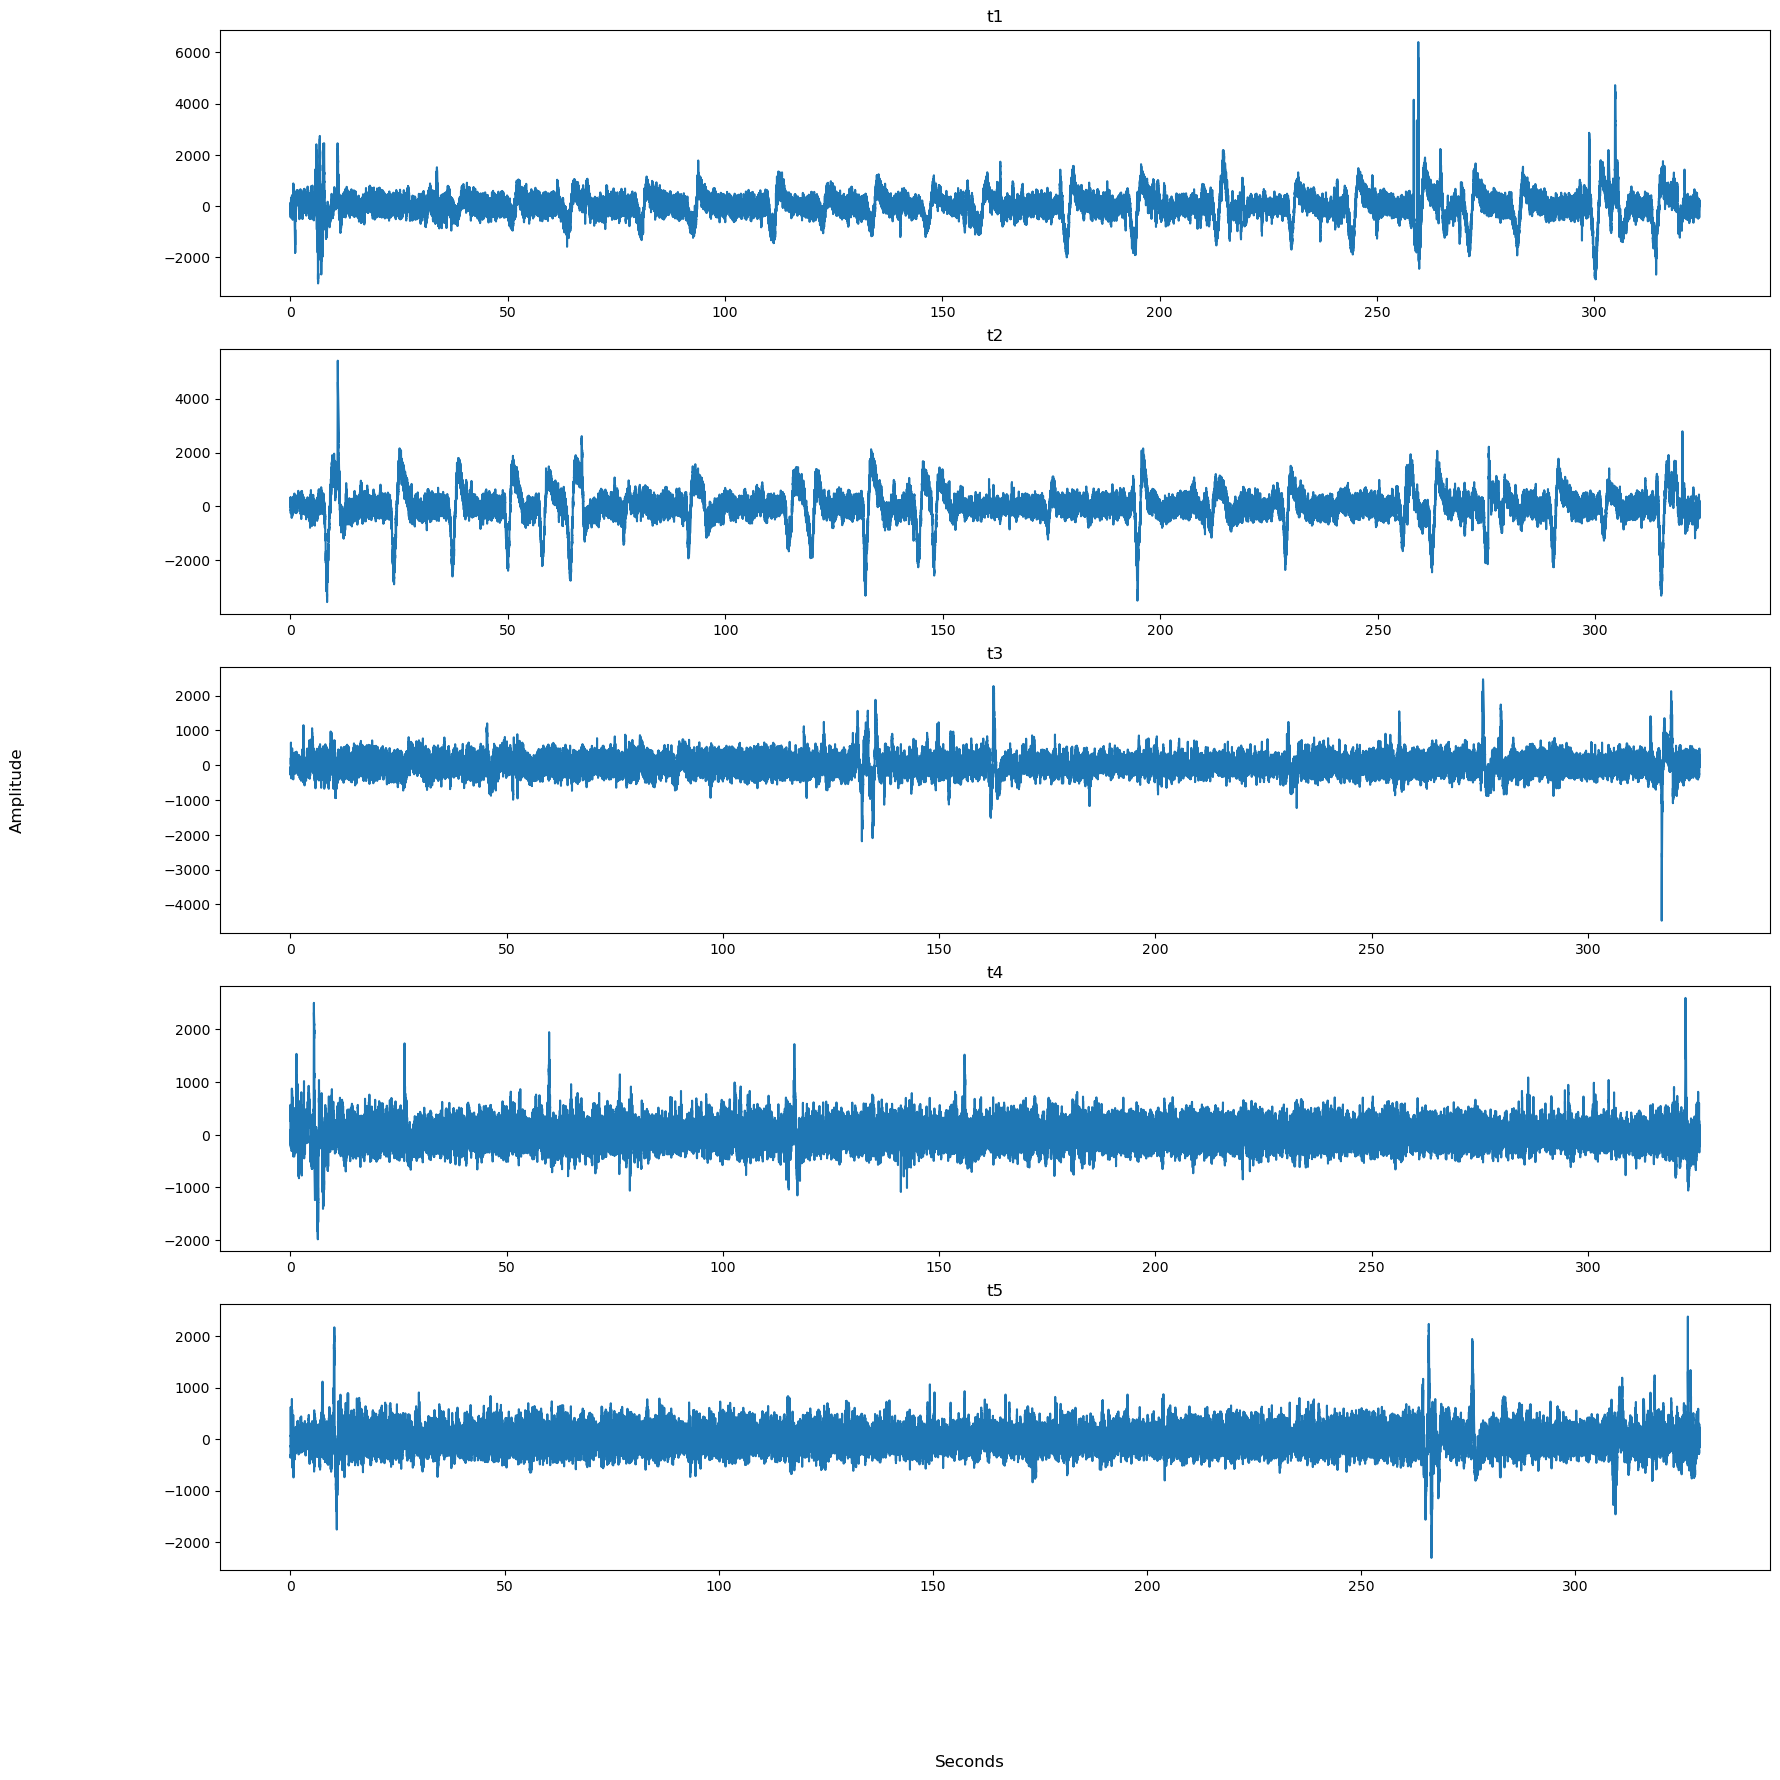

In [6]:
# Plots of the trials
fig1,axs1 = plt.subplots(5,1, figsize=(20,20))
axs1[0].plot(np.arange(0,len(t1))/srate, t1)
axs1[1].plot(np.arange(0,len(t2))/srate, t2)
axs1[2].plot(np.arange(0,len(t3))/srate, t3)
axs1[3].plot(np.arange(0,len(t4))/srate, t4)
axs1[4].plot(np.arange(0,len(t5))/srate, t5)
fig1.supxlabel('Seconds')
fig1.supylabel('Amplitude')
axs1[0].set_title('t1')
axs1[1].set_title('t2')
axs1[2].set_title('t3')
axs1[3].set_title('t4')
axs1[4].set_title('t5')
plt.show()

In [68]:
imfs_methods, masks_methods = run_mask_methods(t1, srate, [itmask, ifmask, zcmask, itmaskif])
imfs_methods.append(ensemble(t1))

In [4]:
trials_list = [t1, t2, t3, t4, t5]
maskmethods_list = [itmask, ifmask, zcmask, itmaskif]
ensemblemethods_list = [ensemble]

[[0.00785821 0.26975553 0.44500267 0.00788253 0.28096736]
 [0.00754127 0.20403881 0.42713446 0.00756883 0.25649975]
 [0.00909309 0.20165242 0.41122846 0.00940624 0.29521517]
 [0.02593325 0.22226292 0.42577488 0.02405673 0.30022971]
 [0.01931956 0.22201574 0.42376015 0.02260756 0.2876875 ]]


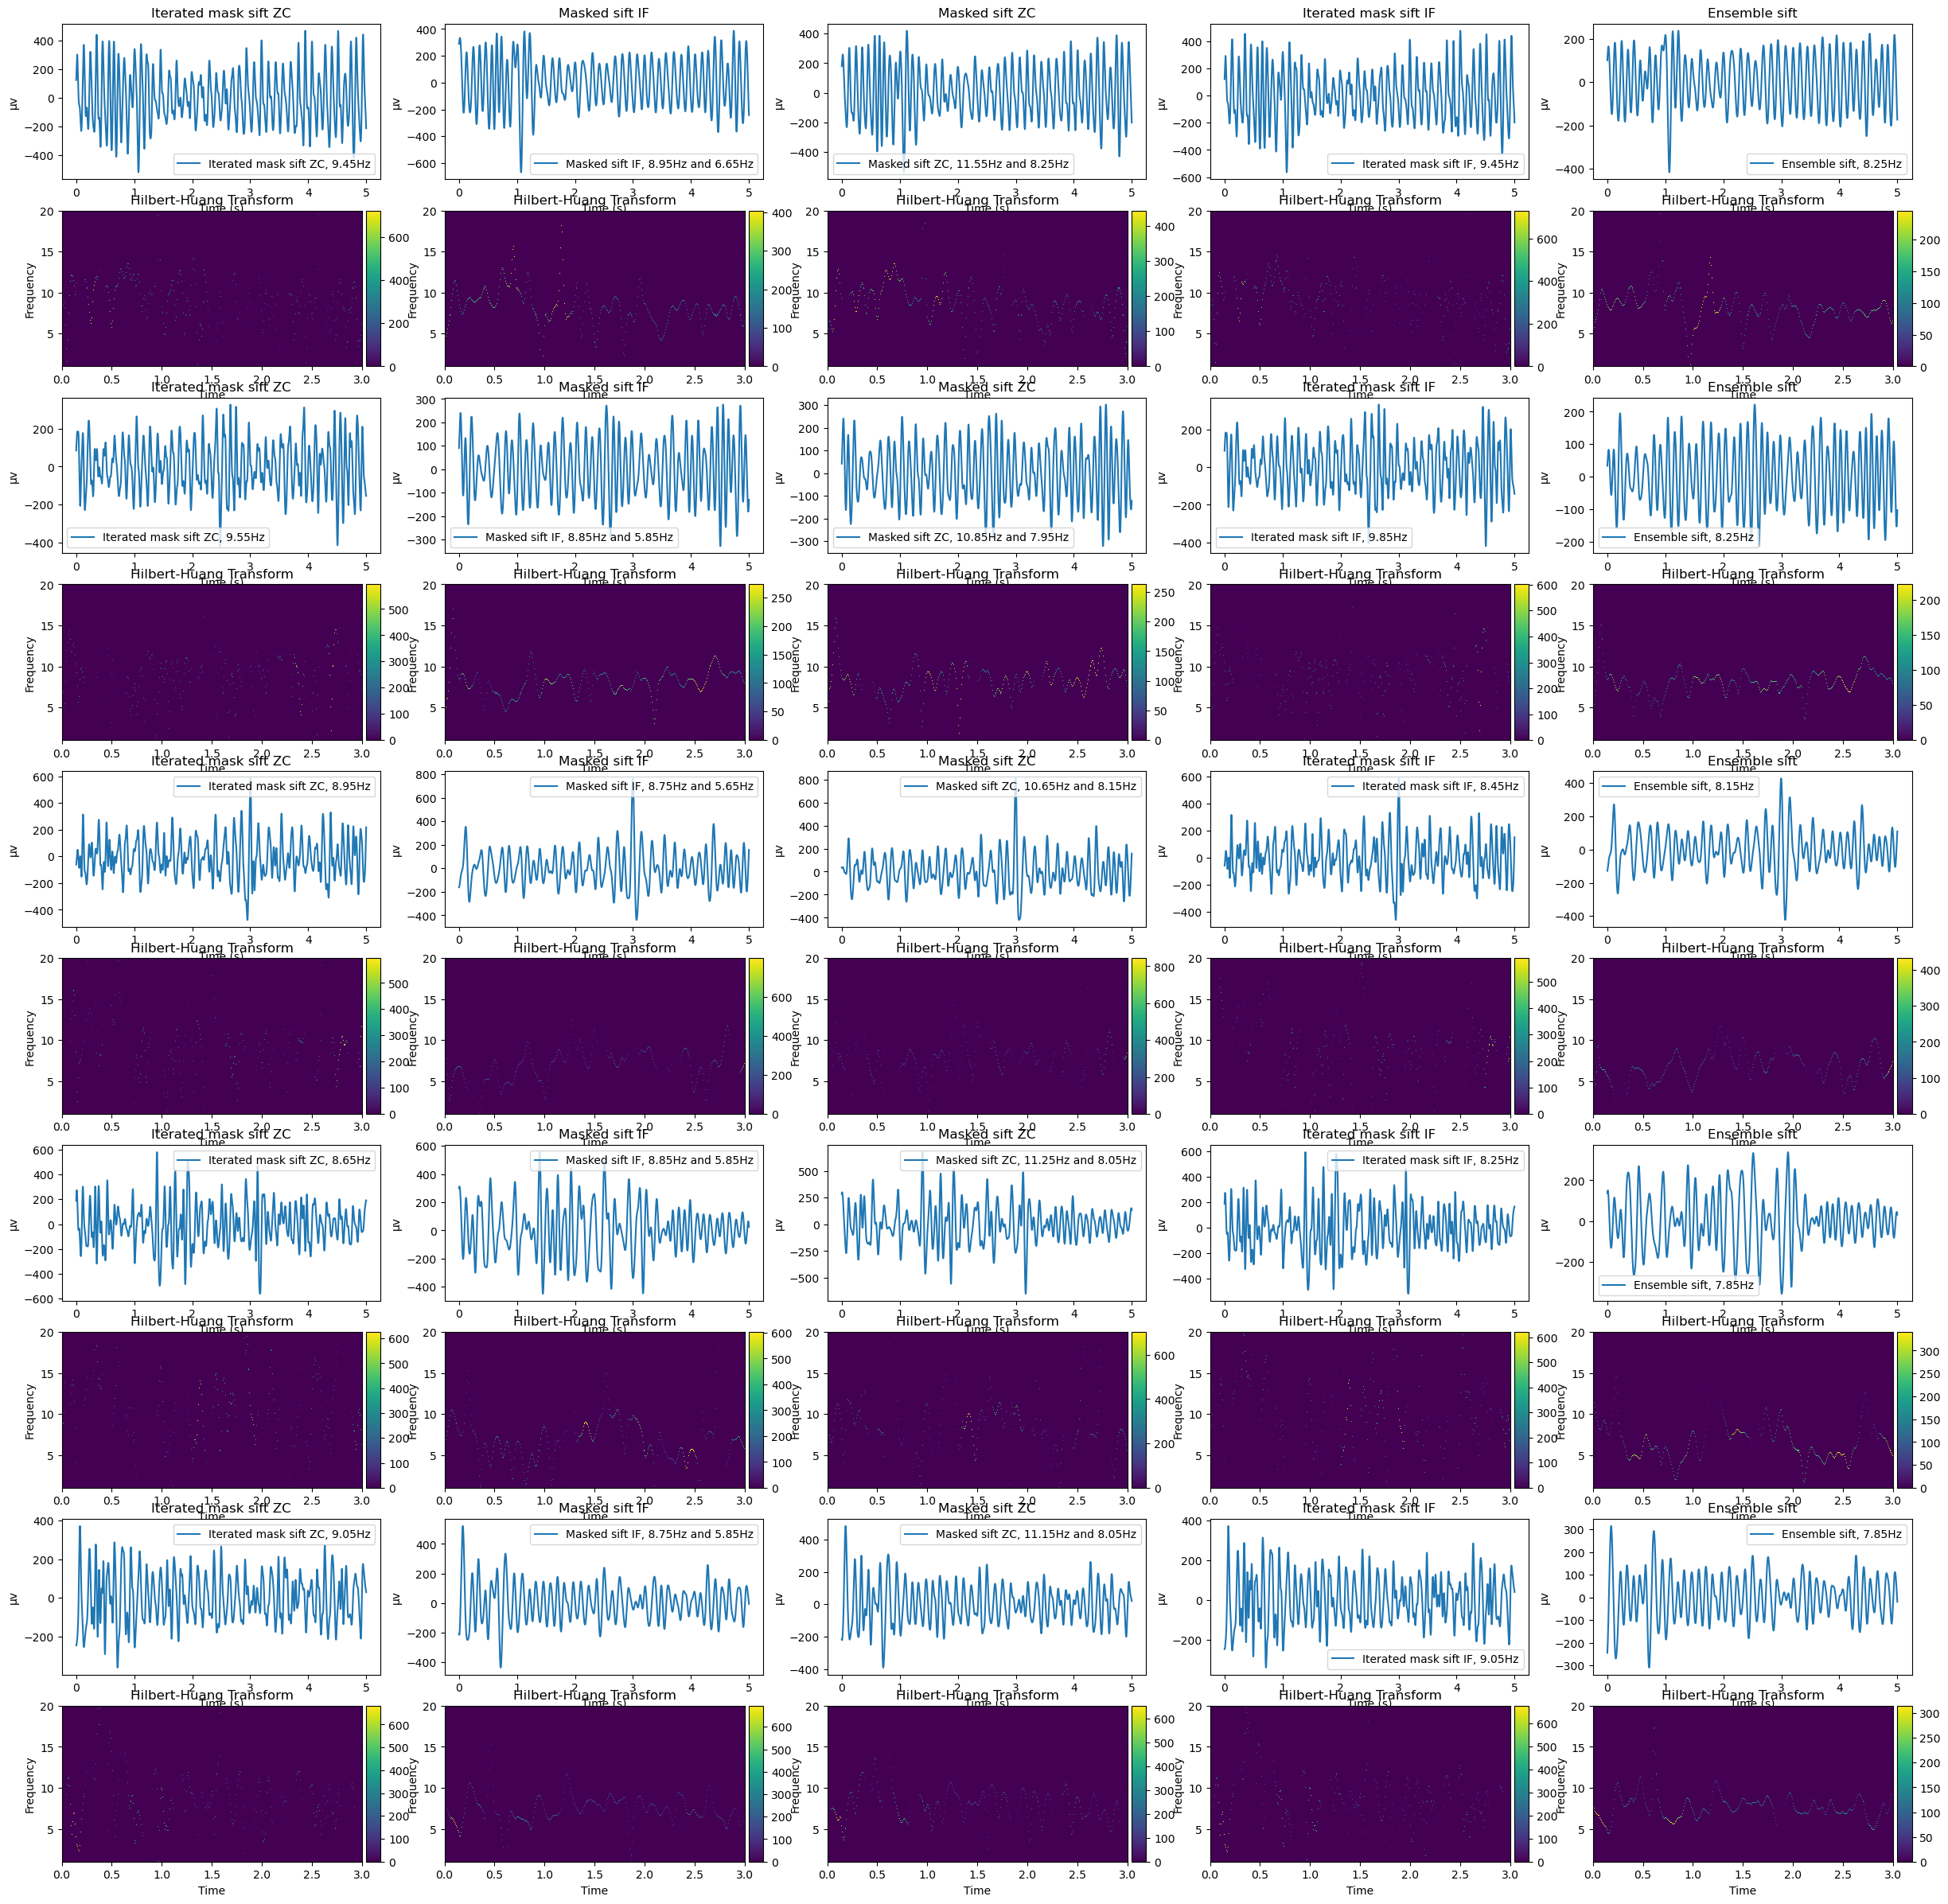

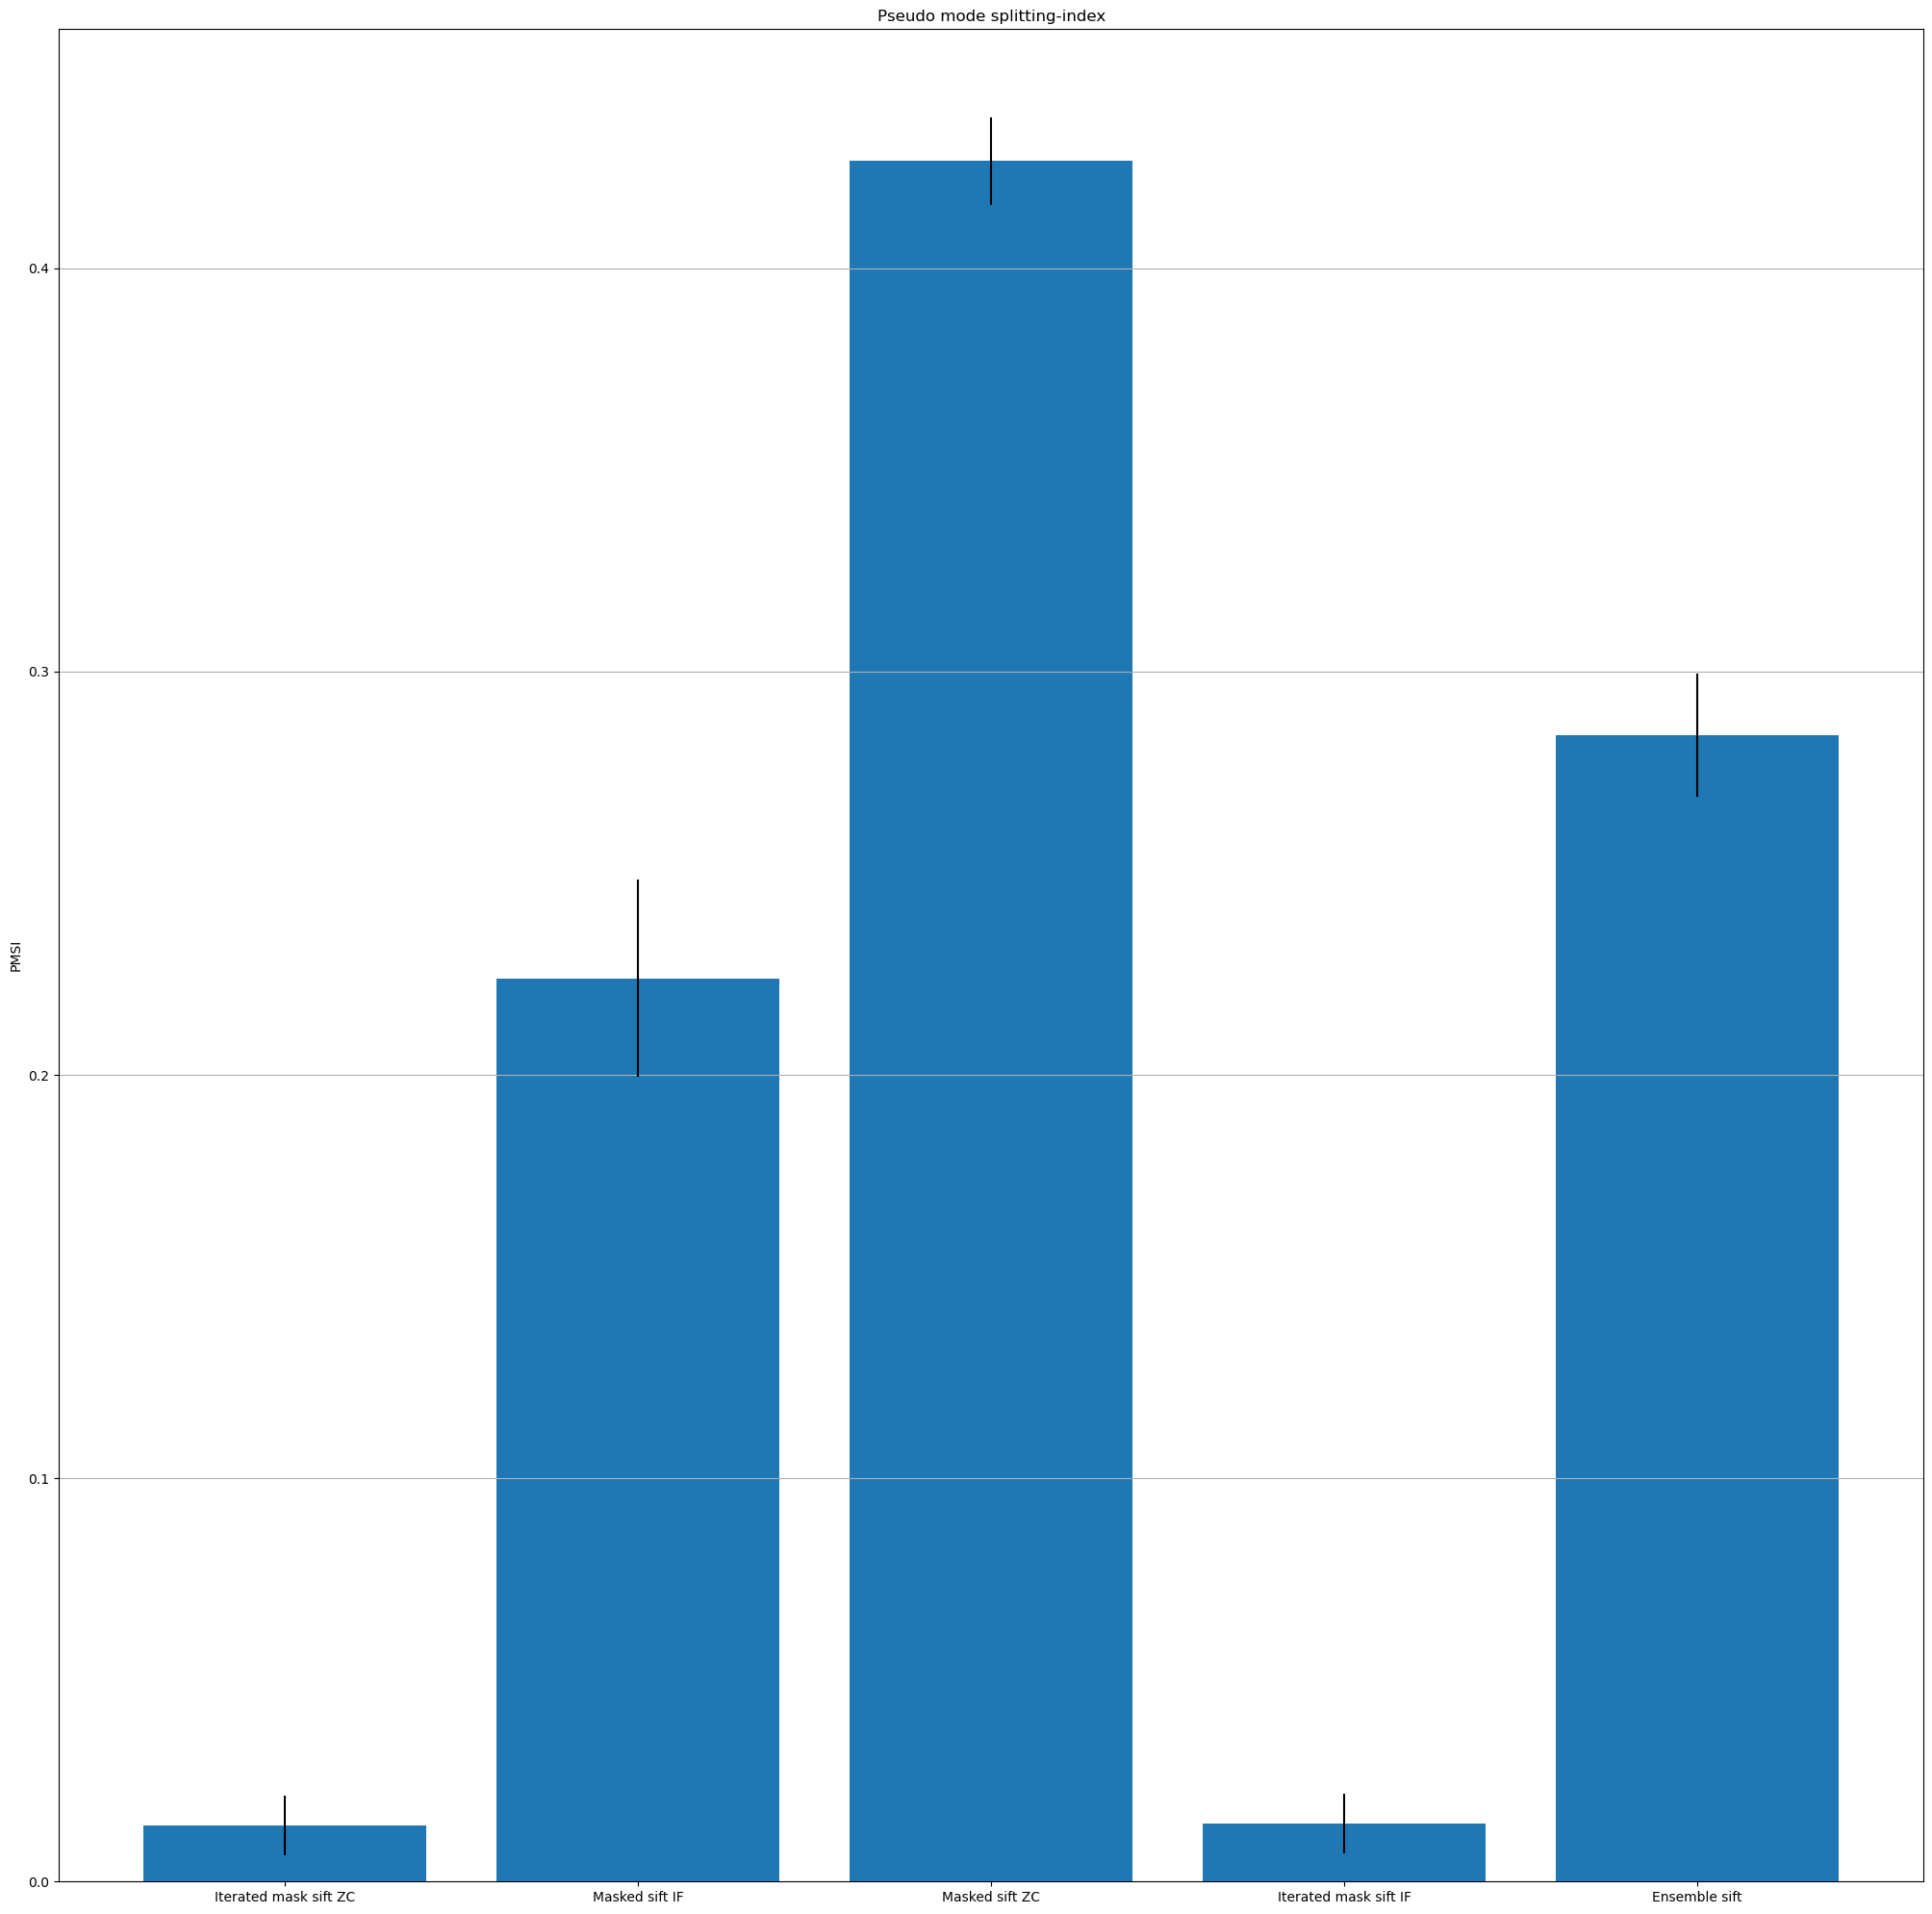

In [5]:
trials_analysis(trials_list, maskmethods_list, ensemblemethods_list, method_names, srate, freq_edges, freq_centres)

[[0.00785821 0.26975553 0.44500267 0.00788253 0.286982  ]
 [0.00754127 0.20403881 0.42713446 0.00756883 0.25655334]
 [0.00909309 0.20165242 0.41122846 0.00940624 0.29874853]
 [0.02593325 0.22226292 0.42577488 0.02405673 0.31165737]
 [0.01931956 0.22201574 0.42376015 0.02260756 0.29031977]]


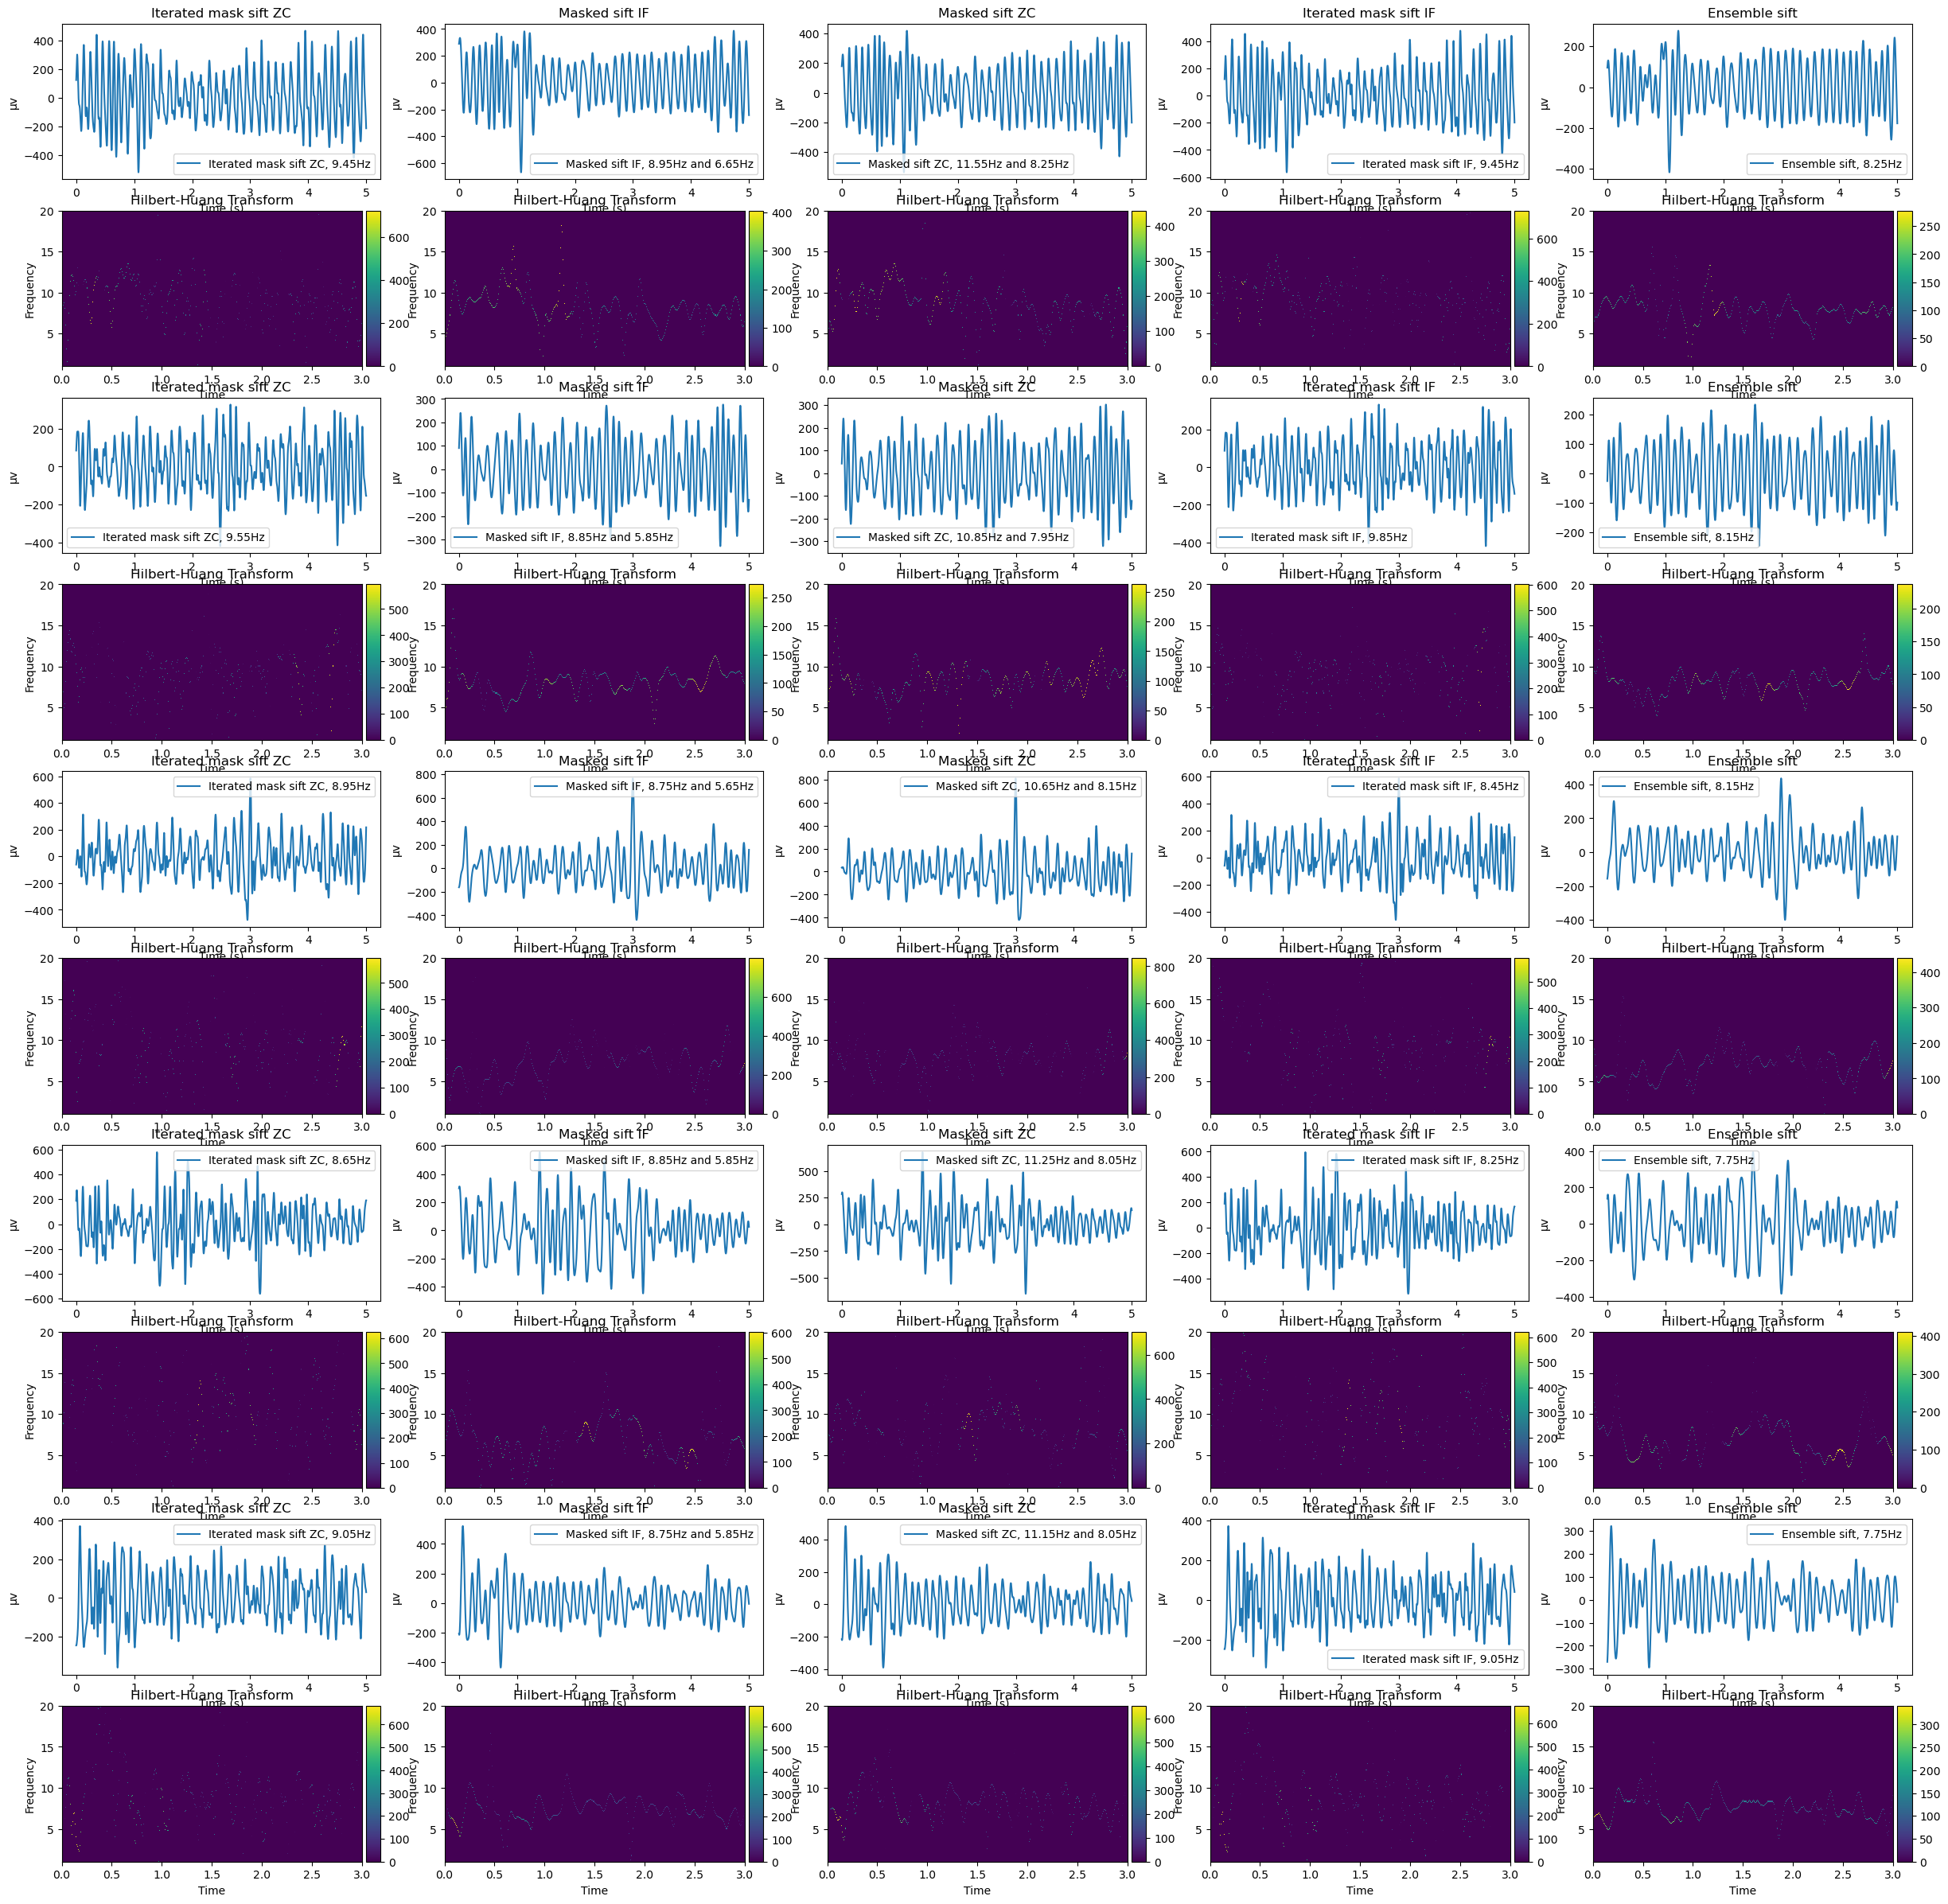

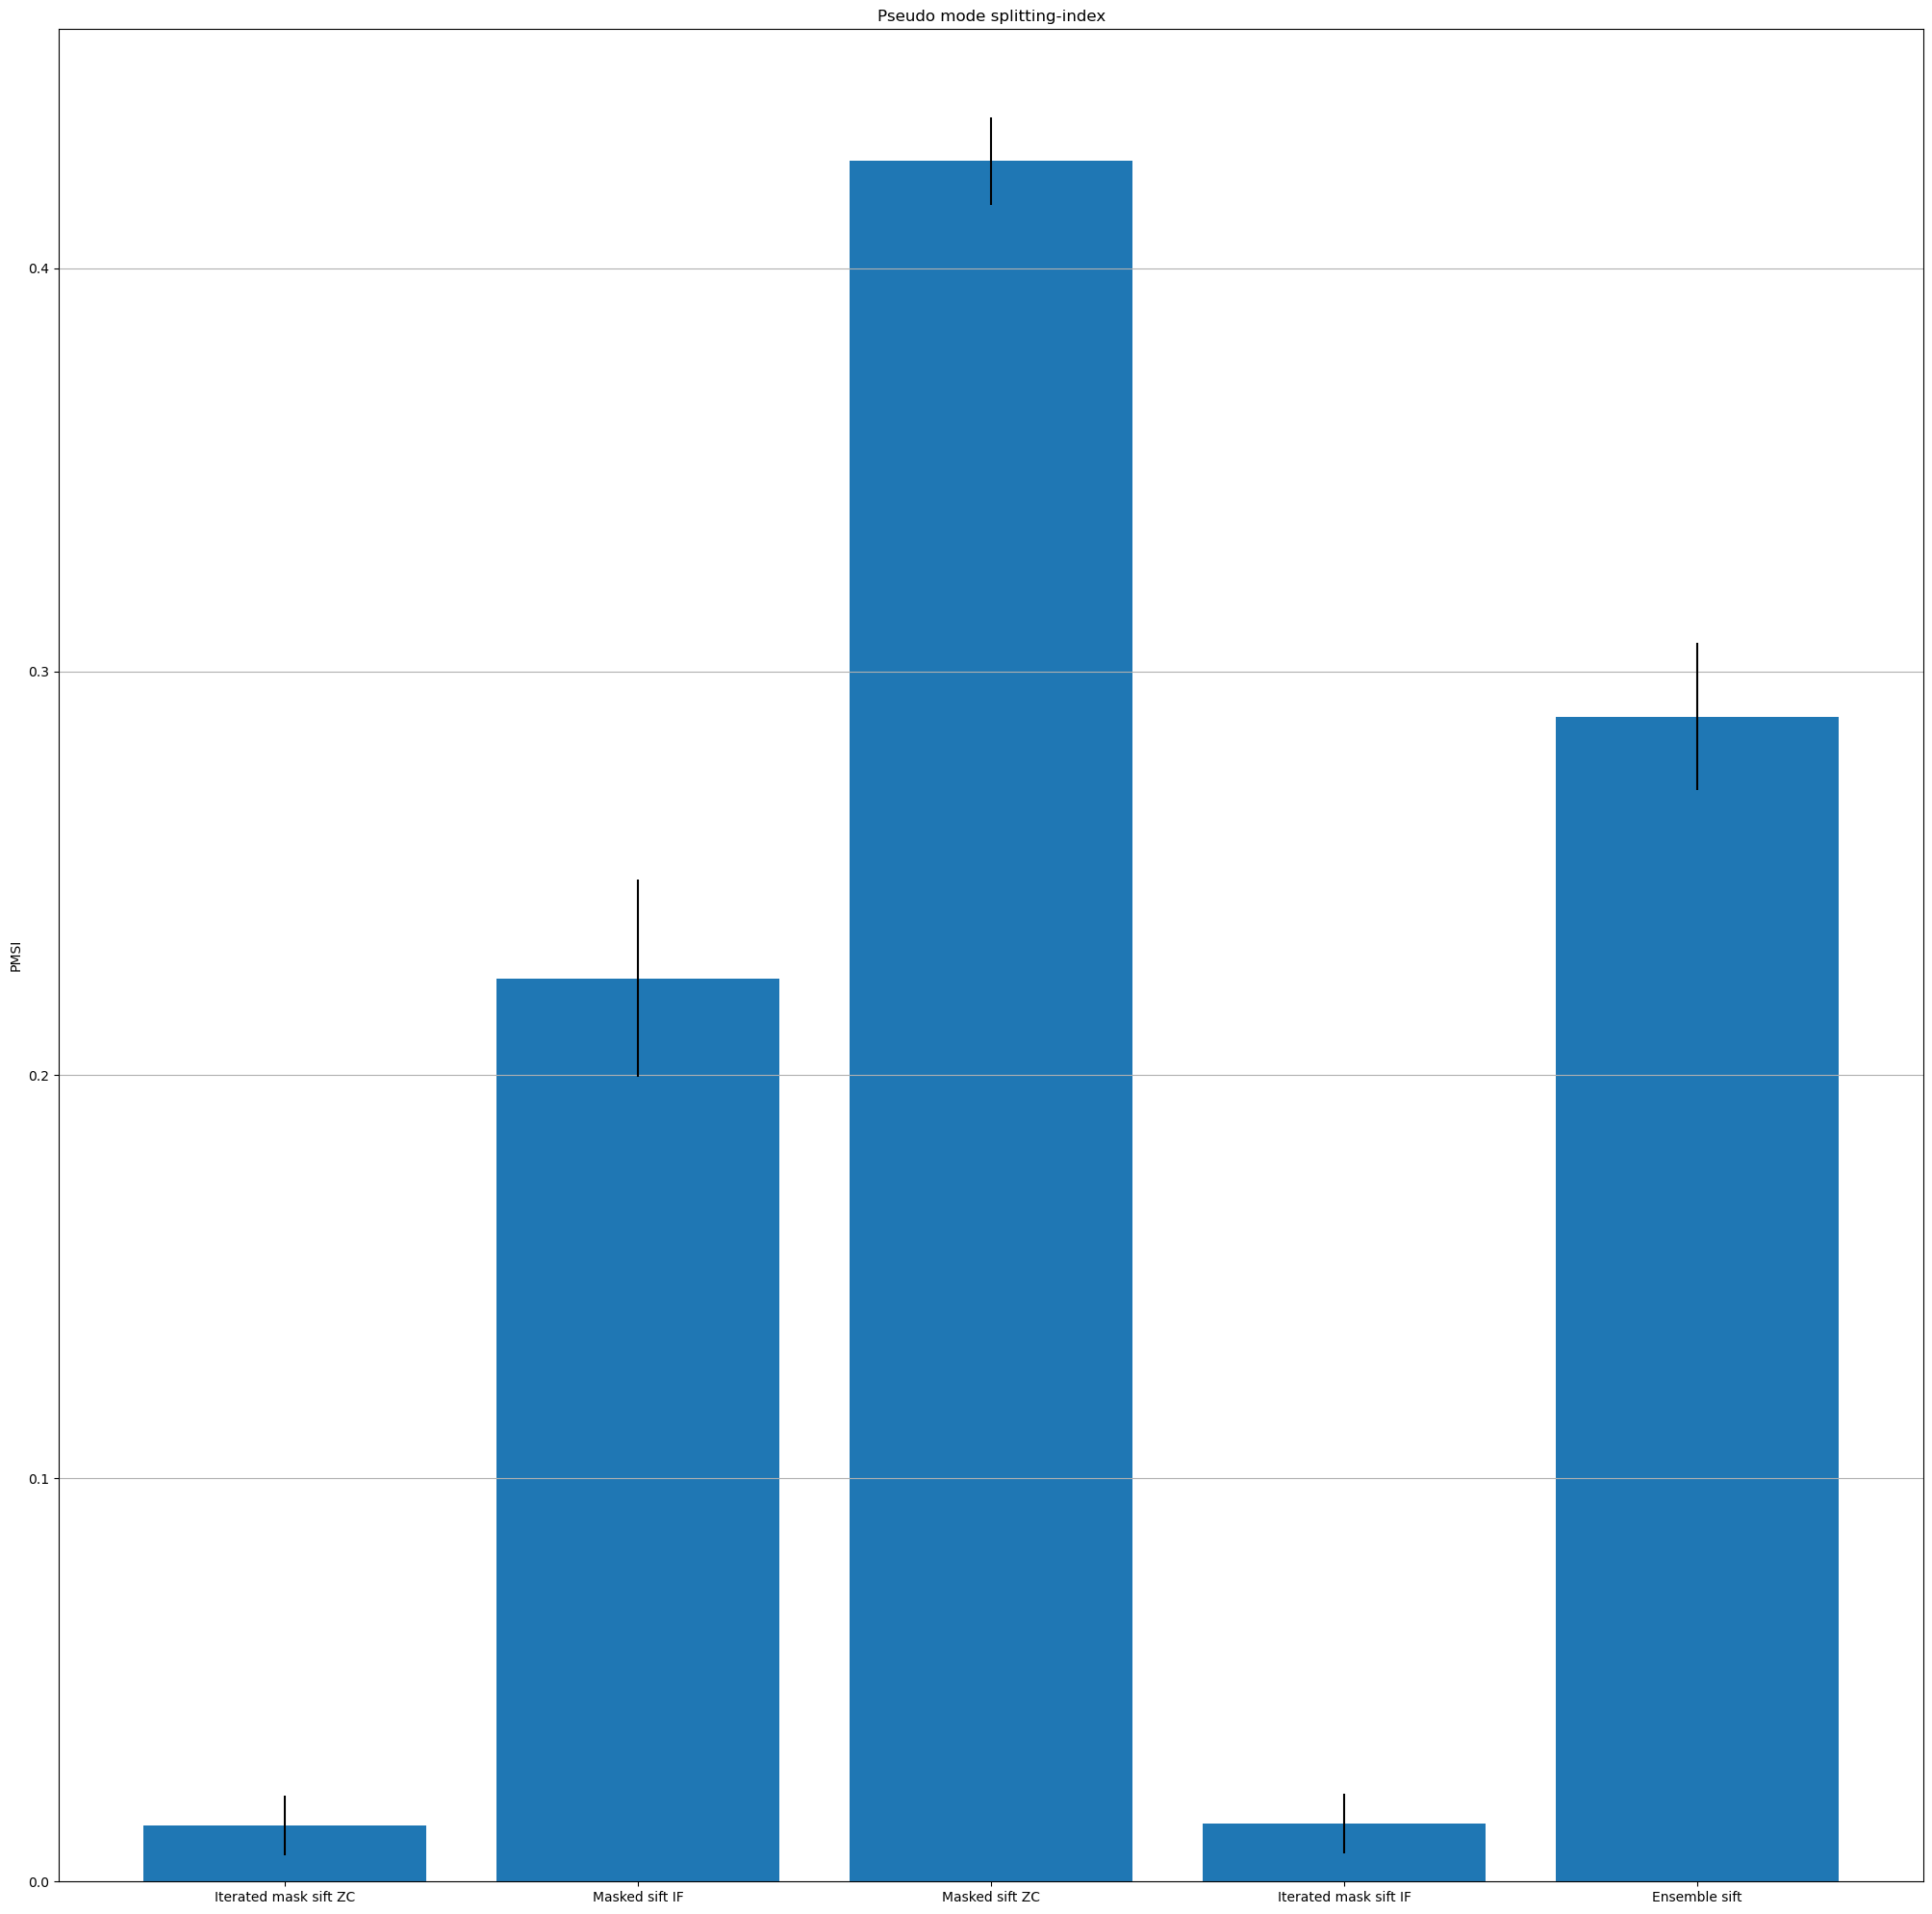

In [9]:
trials_analysis(trials_list, maskmethods_list, ensemblemethods_list, method_names, srate, freq_edges, freq_centres)

In [69]:
freq_stats = freqtr_methods(imfs_methods, srate)

In [70]:
freqs_imfs_all, theta_indices_all, f_all, hht_all = calc_imf_freqs_all(freq_stats, freq_edges)

In [ ]:
imfs_methods_ae, selected_imfs_all, selected_freqs_all, theta_indices_all, selected_hhts = select_imfs(imfs_methods, freqs_imfs_all, theta_indices_all, freq_edges, hht_all, srate)

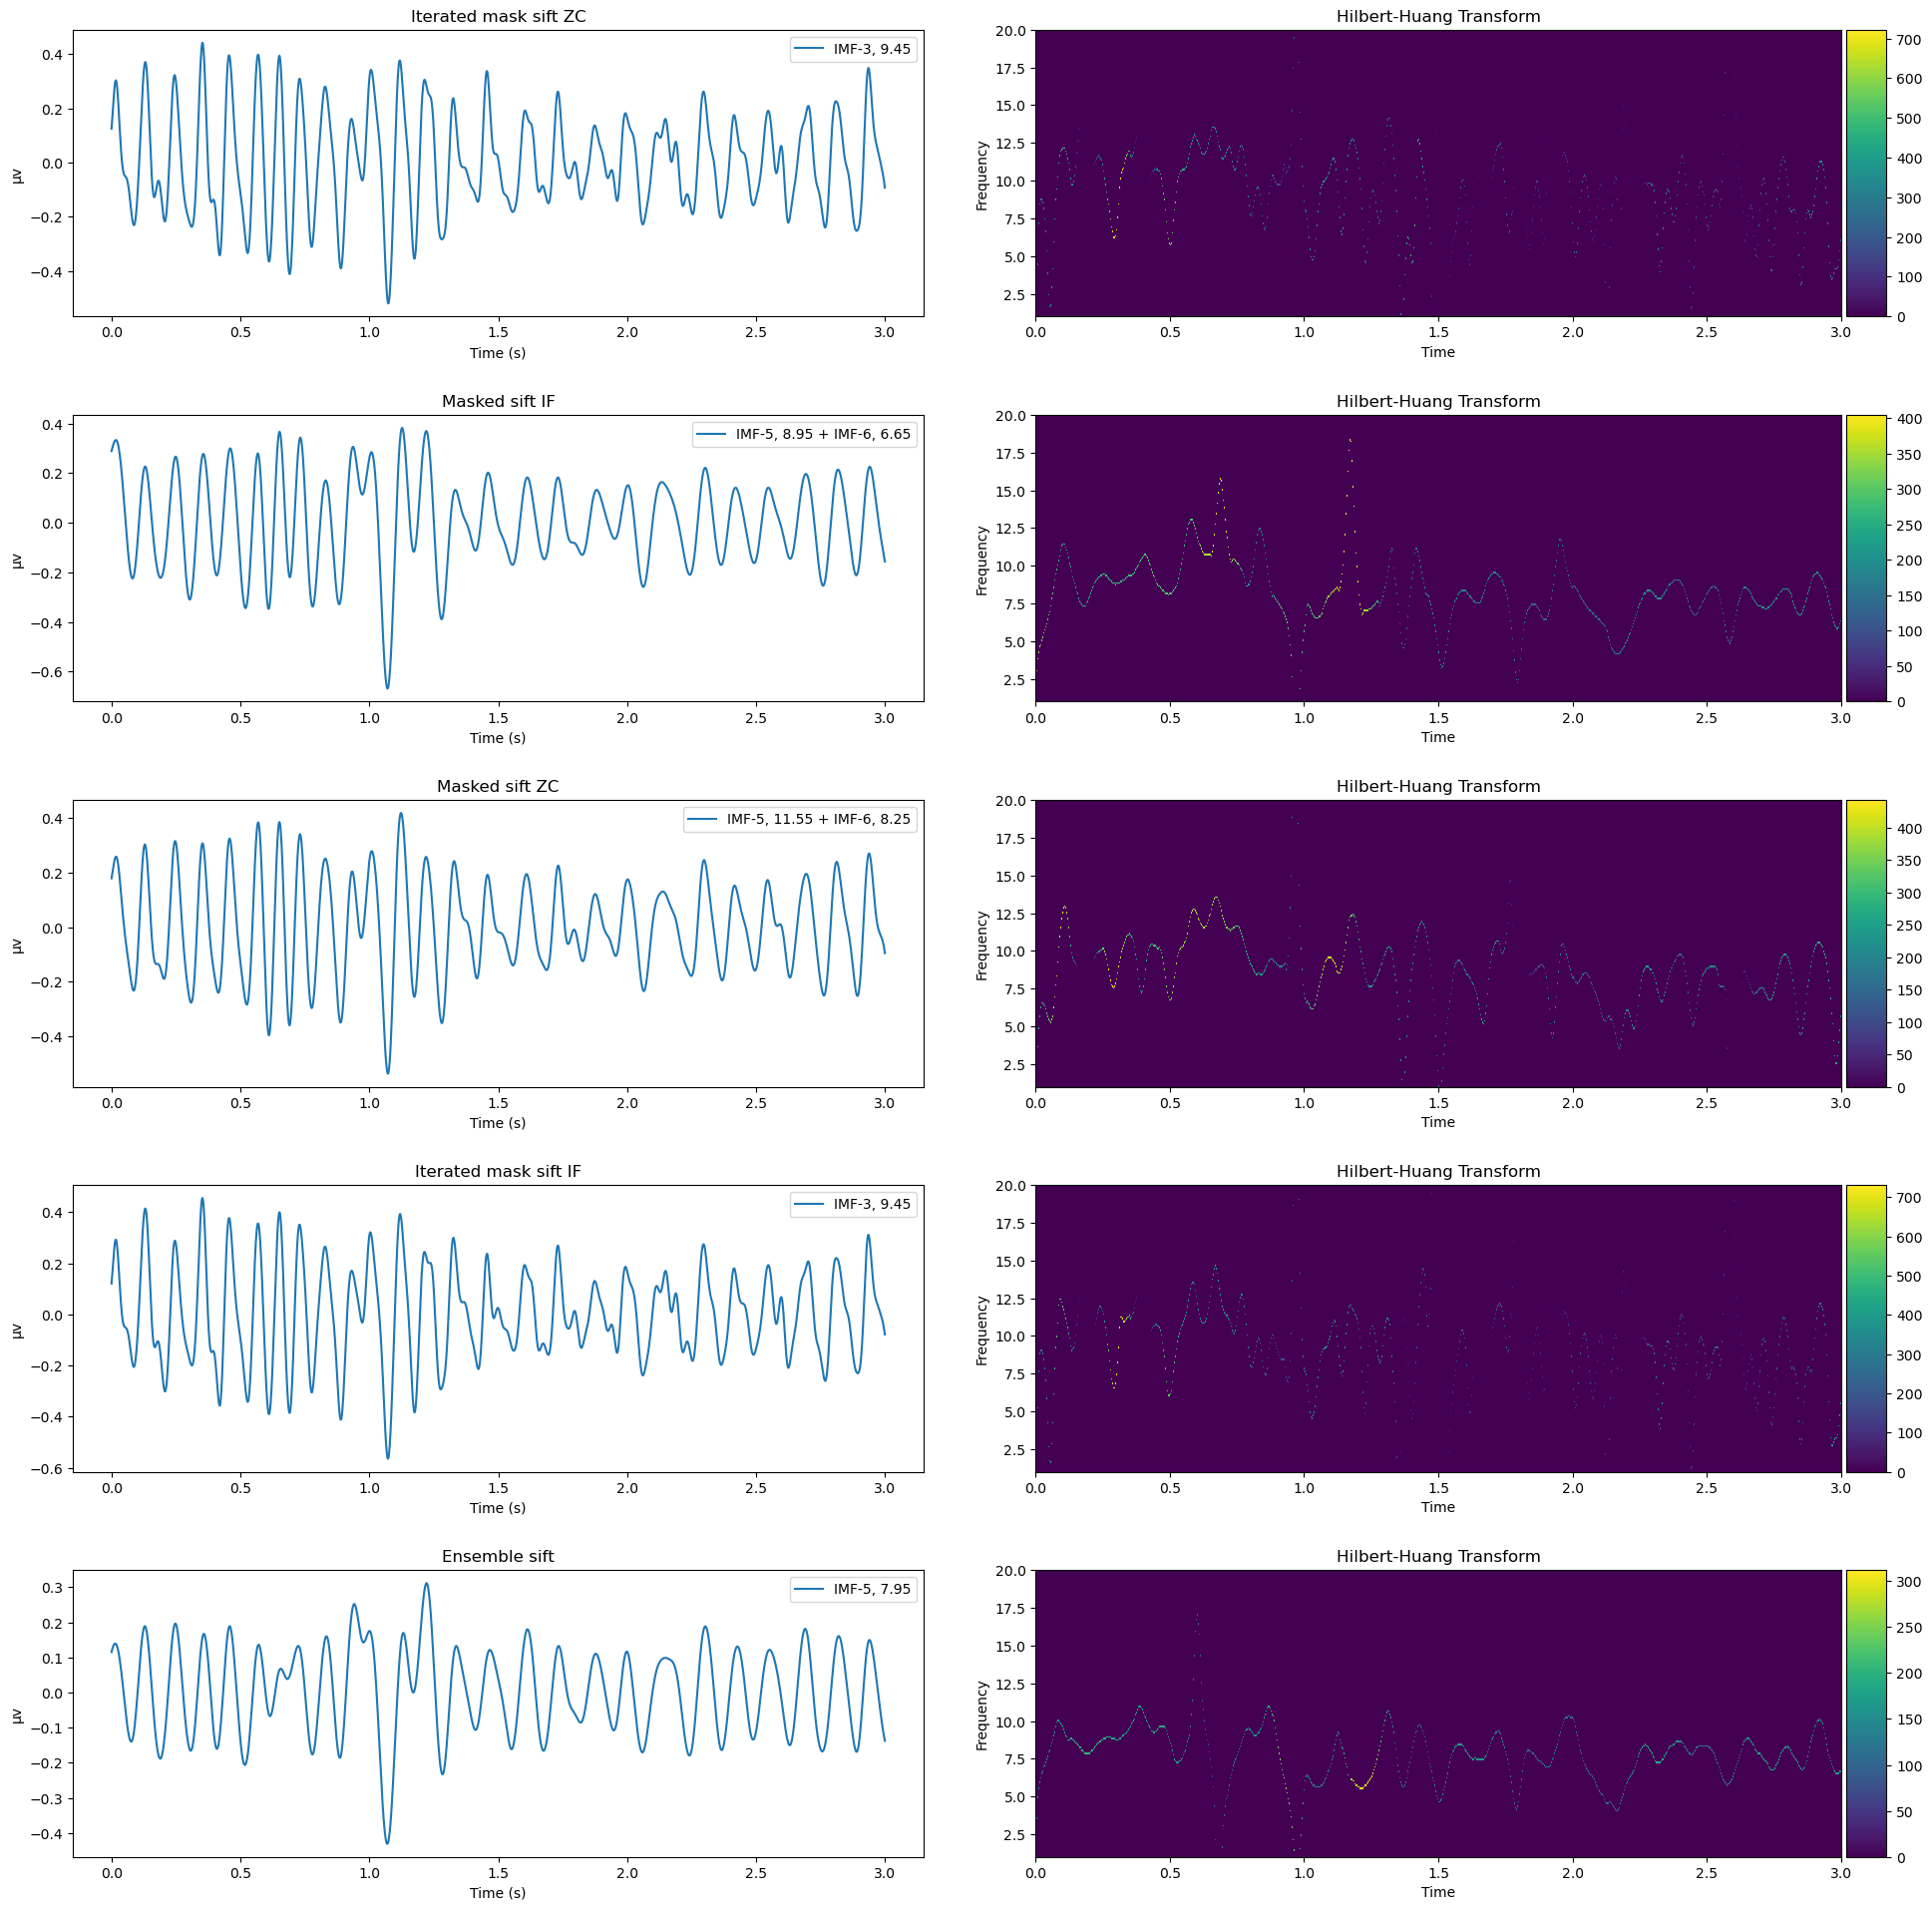

In [81]:
plot_imfs_methods(selected_imfs_all, method_names, freqs_imfs_all, theta_indices_all, f_all, selected_hhts, srate)